In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
import cmcrameri.cm as cmcm

In [2]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_375 = np.linspace(0,1023,1024)*0.044790246422816475 + 745.655738274089
sumer_375_window = sumer_img[:,1024:2048]
sumer_375_window.shape

(300, 1024)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


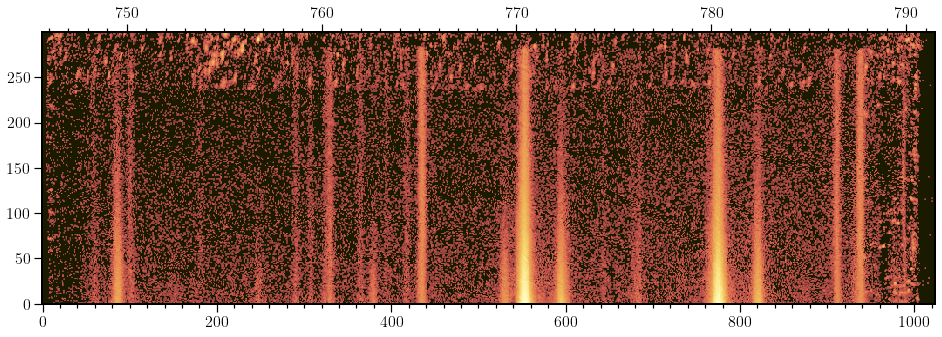

In [4]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_375_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_375[0],wvl_375[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

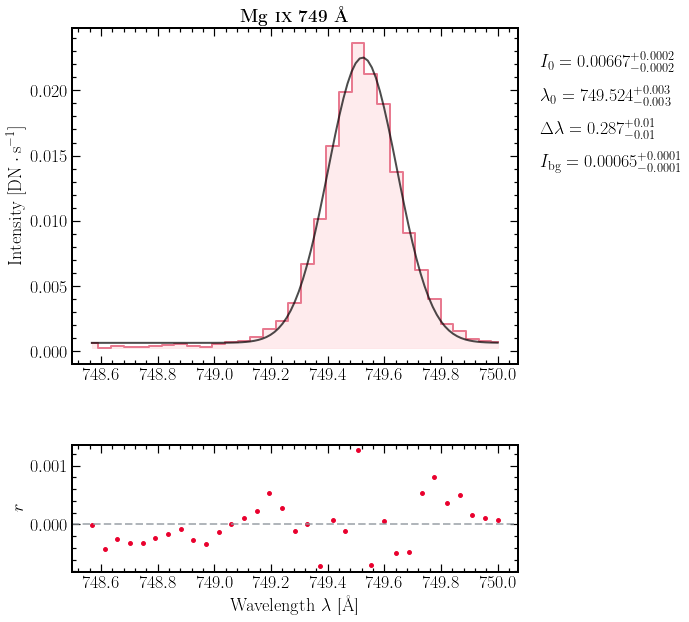

In [45]:
MgIX_749_slice = (65,98)
wvl_MgIX_749 = wvl_375[MgIX_749_slice[0]:MgIX_749_slice[1]]
int_MgIX_749 = np.average(sumer_375_window[-30:,MgIX_749_slice[0]:MgIX_749_slice[1]],axis=0)

MgIX_749_fit_model = SpectrumFitSingle(data=int_MgIX_749,wvl=wvl_MgIX_749,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[749.5],
                                      int_max_init=[0.02],fwhm_init=[0.3])
#MgIX_749_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_749_fit_model.run_HahnMC(n_chain=10000)
MgIX_749_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} 749 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")

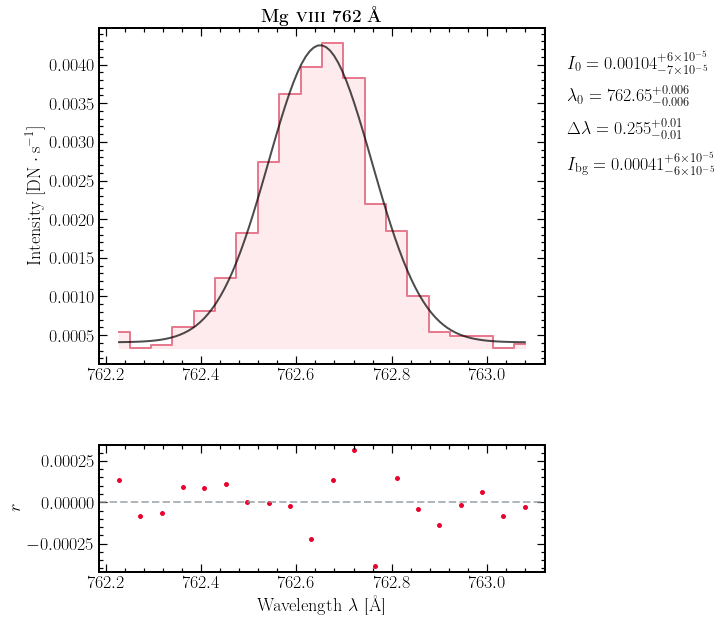

In [46]:
MgVIII_762_slice = (370,390)
wvl_MgVIII_762 = wvl_375[MgVIII_762_slice[0]:MgVIII_762_slice[1]]
int_MgVIII_762 = np.average(sumer_375_window[-30:,MgVIII_762_slice[0]:MgVIII_762_slice[1]],axis=0)

MgVIII_762_fit_model = SpectrumFitSingle(data=int_MgVIII_762,wvl=wvl_MgVIII_762,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[762.7],
                                      int_max_init=[0.004],fwhm_init=[0.3])
#MgVIII_762_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_762_fit_model.run_HahnMC(n_chain=10000)
MgVIII_762_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 762 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")

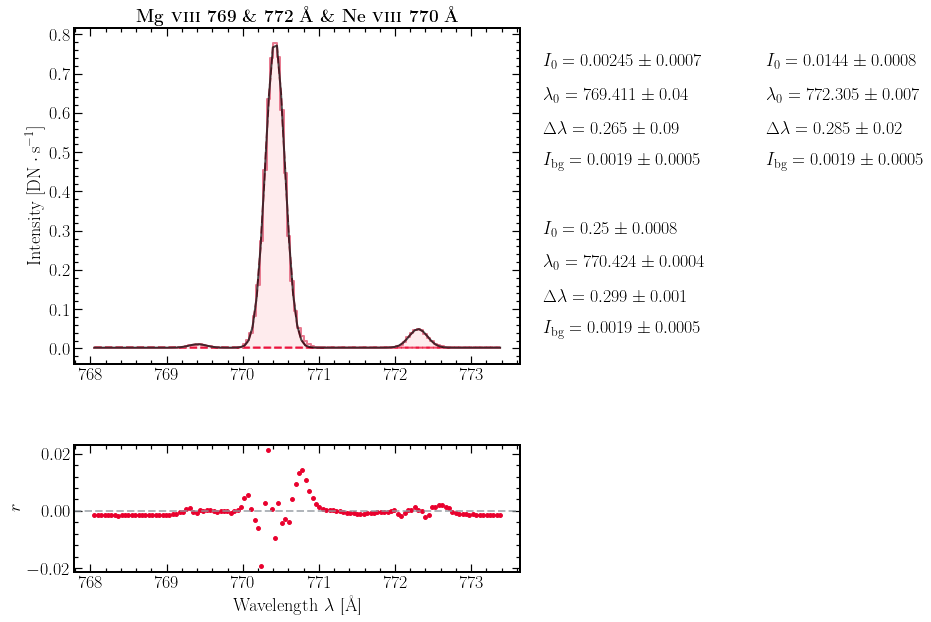

In [27]:
MgVIII_769_772_NeVIII_770_slice = (500,620)
wvl_MgVIII_769_772_NeVIII_770 = wvl_375[MgVIII_769_772_NeVIII_770_slice[0]:MgVIII_769_772_NeVIII_770_slice[1]]
int_MgVIII_769_772_NeVIII_770 = np.average(sumer_375_window[-30:,MgVIII_769_772_NeVIII_770_slice[0]:MgVIII_769_772_NeVIII_770_slice[1]],axis=0)

MgVIII_769_772_NeVIII_770_fit_model = SpectrumFitSingle(data=int_MgVIII_769_772_NeVIII_770,wvl=wvl_MgVIII_769_772_NeVIII_770,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[769.4,770.4,772.3],
                                      int_max_init=[0.02,0.8,0.05],fwhm_init=[0.3,0.3,0.3])
#MgVIII_769_772_NeVIII_770_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_769_772_NeVIII_770_fit_model.run_lse()
MgVIII_769_772_NeVIII_770_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 769 \& 772 \mbox{\AA} \& Ne \textsc{viii} 770 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")

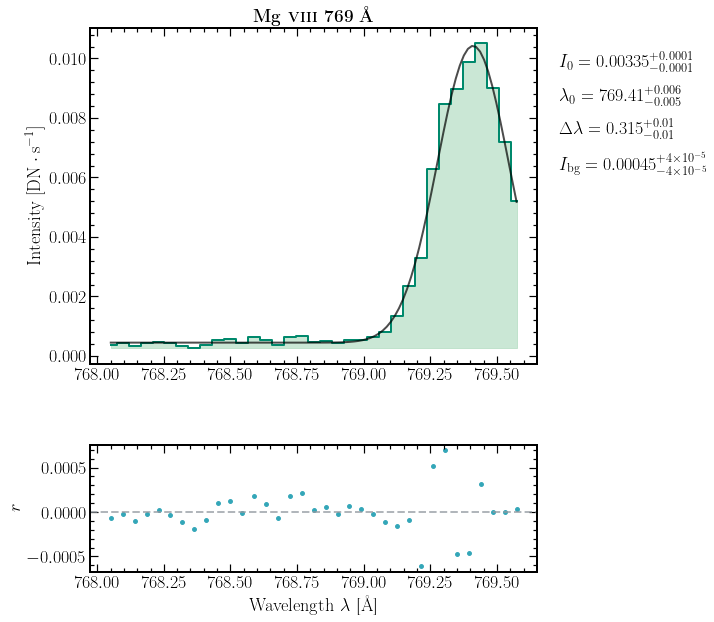

In [48]:
MgVIII_769_slice = (500,535)
wvl_MgVIII_769 = wvl_375[MgVIII_769_slice[0]:MgVIII_769_slice[1]]
int_MgVIII_769 = np.average(sumer_375_window[-30:,MgVIII_769_slice[0]:MgVIII_769_slice[1]],axis=0)

MgVIII_769_fit_model = SpectrumFitSingle(data=int_MgVIII_769,wvl=wvl_MgVIII_769,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[769.3],
                                      int_max_init=[0.01],fwhm_init=[0.3])
#MgVIII_769_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_769_fit_model.run_HahnMC(n_chain=10000)
MgVIII_769_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 769 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Cold")

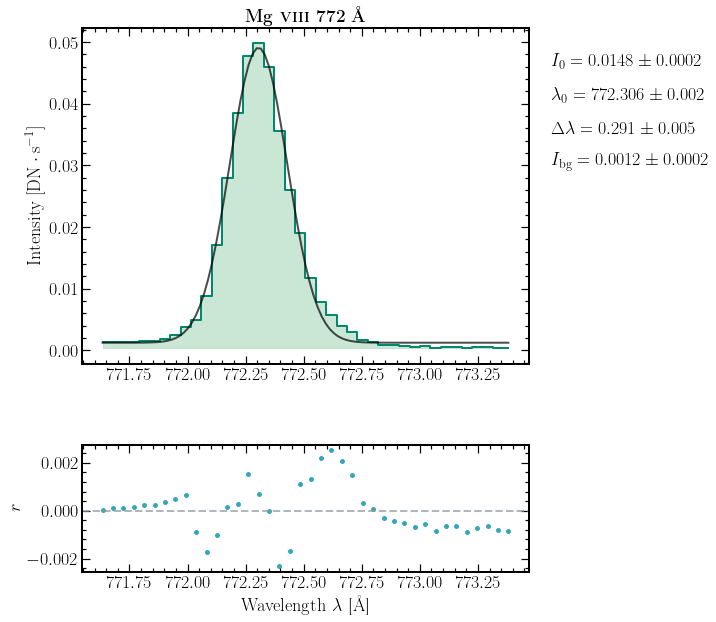

In [35]:
MgVIII_772_slice = (580,620)
wvl_MgVIII_772 = wvl_375[MgVIII_772_slice[0]:MgVIII_772_slice[1]]
int_MgVIII_772 = np.average(sumer_375_window[-30:,MgVIII_772_slice[0]:MgVIII_772_slice[1]],axis=0)

MgVIII_772_fit_model = SpectrumFitSingle(data=int_MgVIII_772,wvl=wvl_MgVIII_772,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[772.3],
                                      int_max_init=[0.05],fwhm_init=[0.3])
#MgVIII_772_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_772_fit_model.run_HahnMC(n_chain=10000)
MgVIII_772_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 772 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Cold")

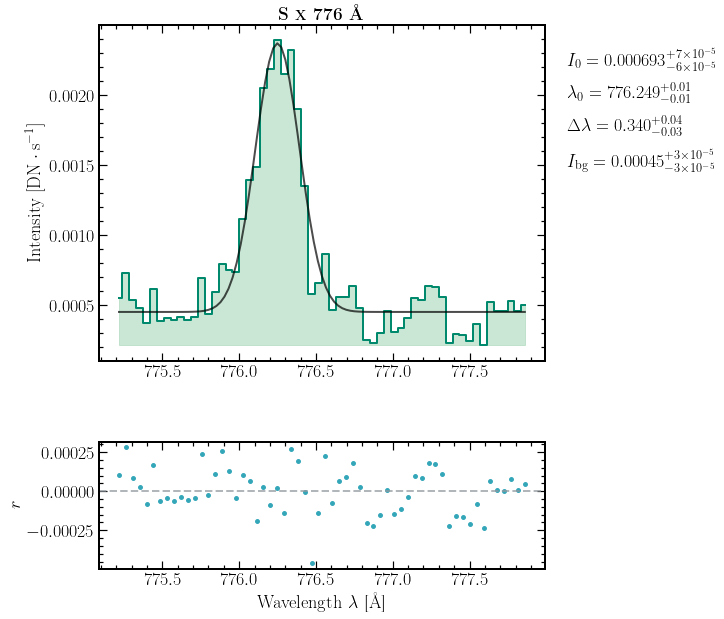

In [49]:
SX_776_slice = (660,720)
wvl_SX_776 = wvl_375[SX_776_slice[0]:SX_776_slice[1]]
int_SX_776 = np.average(sumer_375_window[-30:,SX_776_slice[0]:SX_776_slice[1]],axis=0)

SX_776_fit_model = SpectrumFitSingle(data=int_SX_776,wvl=wvl_SX_776,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[776.2],
                                      int_max_init=[0.002],fwhm_init=[0.3])
#SX_776_fit_model.plot(plot_fit=False,plot_params=False)
SX_776_fit_model.run_HahnMC(n_chain=10000)
SX_776_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 776 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$",
                                color_style="Cold")

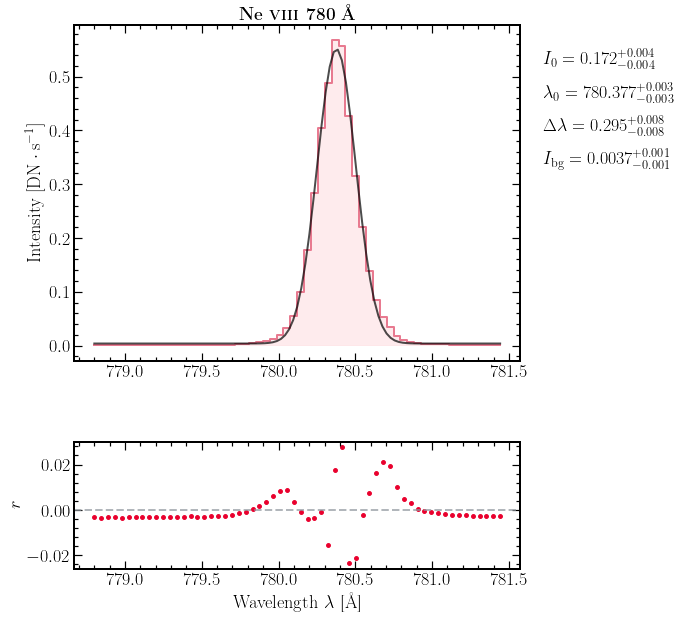

In [50]:
NeVIII_780_slice = (740,800)
wvl_NeVIII_780 = wvl_375[NeVIII_780_slice[0]:NeVIII_780_slice[1]]
int_NeVIII_780 = np.average(sumer_375_window[-30:,NeVIII_780_slice[0]:NeVIII_780_slice[1]],axis=0)

NeVIII_780_fit_model = SpectrumFitSingle(data=int_NeVIII_780,wvl=wvl_NeVIII_780,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[780.4],
                                      int_max_init=[0.5],fwhm_init=[0.3])
#NeVIII_780_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_780_fit_model.run_HahnMC(n_chain=10000)
NeVIII_780_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 780 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")

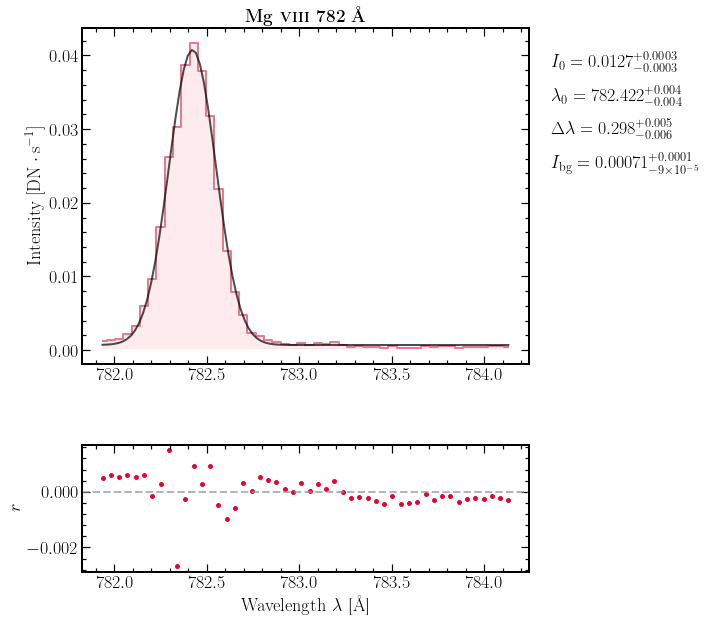

In [51]:
MgVIII_782_slice = (810,860)
wvl_MgVIII_782 = wvl_375[MgVIII_782_slice[0]:MgVIII_782_slice[1]]
int_MgVIII_782 = np.average(sumer_375_window[-30:,MgVIII_782_slice[0]:MgVIII_782_slice[1]],axis=0)

MgVIII_782_fit_model = SpectrumFitSingle(data=int_MgVIII_782,wvl=wvl_MgVIII_782,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[782.4],
                                      int_max_init=[0.04],fwhm_init=[0.3])
#MgVIII_782_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_782_fit_model.run_HahnMC(n_chain=10000)
MgVIII_782_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 782 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")